# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent
from itertools import count

agent = Agent(state_size=state_size, action_size=action_size, random_seed=2,num_agents=num_agents )

Episode 1	Average Score (max over agents) : 0.0000
Episode 2	Average Score (max over agents) : 0.0000
Episode 3	Average Score (max over agents) : 0.0000
Episode 4	Average Score (max over agents) : 0.0000
Episode 5	Average Score (max over agents) : 0.0180
Episode 6	Average Score (max over agents) : 0.0150
Episode 7	Average Score (max over agents) : 0.0129
Episode 8	Average Score (max over agents) : 0.0238
Episode 9	Average Score (max over agents) : 0.0211
Episode 10	Average Score (max over agents) : 0.0190
Episode 11	Average Score (max over agents) : 0.0173
Episode 12	Average Score (max over agents) : 0.0158
Episode 13	Average Score (max over agents) : 0.0146
Episode 14	Average Score (max over agents) : 0.0207
Episode 15	Average Score (max over agents) : 0.0260
Episode 16	Average Score (max over agents) : 0.0244
Episode 17	Average Score (max over agents) : 0.0229
Episode 18	Average Score (max over agents) : 0.0267
Episode 19	Average Score (max over agents) : 0.0253
Episode 20	Average Sc

Episode 158	Average Score (max over agents) : 0.0000
Episode 159	Average Score (max over agents) : 0.0000
Episode 160	Average Score (max over agents) : 0.0000
Episode 161	Average Score (max over agents) : 0.0000
Episode 162	Average Score (max over agents) : 0.0000
Episode 163	Average Score (max over agents) : 0.0000
Episode 164	Average Score (max over agents) : 0.0000
Episode 165	Average Score (max over agents) : 0.0000
Episode 166	Average Score (max over agents) : 0.0000
Episode 167	Average Score (max over agents) : 0.0000
Episode 168	Average Score (max over agents) : 0.0000
Episode 169	Average Score (max over agents) : 0.0000
Episode 170	Average Score (max over agents) : 0.0000
Episode 171	Average Score (max over agents) : 0.0000
Episode 172	Average Score (max over agents) : 0.0000
Episode 173	Average Score (max over agents) : 0.0000
Episode 174	Average Score (max over agents) : 0.0000
Episode 175	Average Score (max over agents) : 0.0000
Episode 176	Average Score (max over agents) : 

Episode 313	Average Score (max over agents) : 0.0000
Episode 314	Average Score (max over agents) : 0.0000
Episode 315	Average Score (max over agents) : 0.0000
Episode 316	Average Score (max over agents) : 0.0000
Episode 317	Average Score (max over agents) : 0.0000
Episode 318	Average Score (max over agents) : 0.0000
Episode 319	Average Score (max over agents) : 0.0000
Episode 320	Average Score (max over agents) : 0.0000
Episode 321	Average Score (max over agents) : 0.0000
Episode 322	Average Score (max over agents) : 0.0000
Episode 323	Average Score (max over agents) : 0.0000
Episode 324	Average Score (max over agents) : 0.0000
Episode 325	Average Score (max over agents) : 0.0000
Episode 326	Average Score (max over agents) : 0.0000
Episode 327	Average Score (max over agents) : 0.0000
Episode 328	Average Score (max over agents) : 0.0000
Episode 329	Average Score (max over agents) : 0.0000
Episode 330	Average Score (max over agents) : 0.0000
Episode 331	Average Score (max over agents) : 

Episode 468	Average Score (max over agents) : 0.0145
Episode 469	Average Score (max over agents) : 0.0145
Episode 470	Average Score (max over agents) : 0.0145
Episode 471	Average Score (max over agents) : 0.0145
Episode 472	Average Score (max over agents) : 0.0145
Episode 473	Average Score (max over agents) : 0.0154
Episode 474	Average Score (max over agents) : 0.0154
Episode 475	Average Score (max over agents) : 0.0154
Episode 476	Average Score (max over agents) : 0.0154
Episode 477	Average Score (max over agents) : 0.0154
Episode 478	Average Score (max over agents) : 0.0174
Episode 479	Average Score (max over agents) : 0.0184
Episode 480	Average Score (max over agents) : 0.0184
Episode 481	Average Score (max over agents) : 0.0194
Episode 482	Average Score (max over agents) : 0.0203
Episode 483	Average Score (max over agents) : 0.0213
Episode 484	Average Score (max over agents) : 0.0223
Episode 485	Average Score (max over agents) : 0.0233
Episode 486	Average Score (max over agents) : 

Episode 623	Average Score (max over agents) : 0.0372
Episode 624	Average Score (max over agents) : 0.0372
Episode 625	Average Score (max over agents) : 0.0373
Episode 626	Average Score (max over agents) : 0.0382
Episode 627	Average Score (max over agents) : 0.0392
Episode 628	Average Score (max over agents) : 0.0401
Episode 629	Average Score (max over agents) : 0.0401
Episode 630	Average Score (max over agents) : 0.0402
Episode 631	Average Score (max over agents) : 0.0402
Episode 632	Average Score (max over agents) : 0.0402
Episode 633	Average Score (max over agents) : 0.0392
Episode 634	Average Score (max over agents) : 0.0392
Episode 635	Average Score (max over agents) : 0.0393
Episode 636	Average Score (max over agents) : 0.0394
Episode 637	Average Score (max over agents) : 0.0384
Episode 638	Average Score (max over agents) : 0.0385
Episode 639	Average Score (max over agents) : 0.0376
Episode 640	Average Score (max over agents) : 0.0376
Episode 641	Average Score (max over agents) : 

Episode 778	Average Score (max over agents) : 0.3647
Episode 779	Average Score (max over agents) : 0.3637
Episode 780	Average Score (max over agents) : 0.3617
Episode 781	Average Score (max over agents) : 0.3627
Episode 782	Average Score (max over agents) : 0.3627
Episode 783	Average Score (max over agents) : 0.3597
Episode 784	Average Score (max over agents) : 0.3617
Episode 785	Average Score (max over agents) : 0.3617
Episode 786	Average Score (max over agents) : 0.3617
Episode 787	Average Score (max over agents) : 0.3557
Episode 788	Average Score (max over agents) : 0.3567
Episode 789	Average Score (max over agents) : 0.3566
Episode 790	Average Score (max over agents) : 0.3575
Episode 791	Average Score (max over agents) : 0.3574
Episode 792	Average Score (max over agents) : 0.3584
Episode 793	Average Score (max over agents) : 0.3594
Episode 794	Average Score (max over agents) : 0.3574
Episode 795	Average Score (max over agents) : 0.3573
Episode 796	Average Score (max over agents) : 

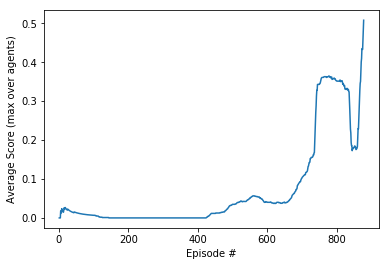

In [6]:
def ddpg(n_episodes=2000, max_t=1000, print_file=100,len=100):
    scores_deque = deque(maxlen=len)
    avg_scores = []
    global_average = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment 
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)                        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send action to  environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones,t)    
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
                
                
        score = np.max(scores)
        scores_deque.append(score)
        avg_score = np.mean(scores_deque) 
        global_average.append(avg_score)
            

        print('\rEpisode {}\tAverage Score (max over agents) : {:.4f}'.format(i_episode, np.mean(avg_score)), end="\n")   
        
        
        if i_episode % print_file == 0:
            torch.save(agent.actor_local.state_dict(),  'checkpoint_actor.pth' )
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.max(avg_score)), end="\n") 
        
        if avg_score >=.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score (max over agents): {:.4f}'.format(i_episode, avg_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
           
    return global_average

avg_scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Average Score (max over agents)')
plt.xlabel('Episode #')
plt.show()